# **Modelling and Evaluating**

## Objectives

* Make an accurate prediction on whether a leaf is healthy or has powdery mildew.

## Inputs

* Image Shape
* inputs/cherry-leaves/test
* inputs/cherry-leaves/train
* inputs/cherry-leaves/validation

## Outputs

* Image augmentation.
* Class indices
* Machine learning model creation and training.
* Save model.
* Curve plot.
* Model evaluation.
* Prediction on image file.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection'

### Directories

In [4]:
base_dir = "/workspace/P5-Mildew-Detection"
test_dir = "/workspace/P5-Mildew-Detection/inputs/cherry-leaves/test"
train_dir = "/workspace/P5-Mildew-Detection/inputs/cherry-leaves/train"
validation_dir = "inputs/cherry-leaves/validation"
cherry_leaves_dir = 'inputs/cherry-leaves'

### Set Output

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(base_dir) and version in os.listdir(base_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set Labels

In [6]:
labels = os.listdir(train_dir)
print(labels)

['healthy', 'powdery_mildew']


### Add imports

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set Image Shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

### Amount of Images In Train, Validation and Test

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


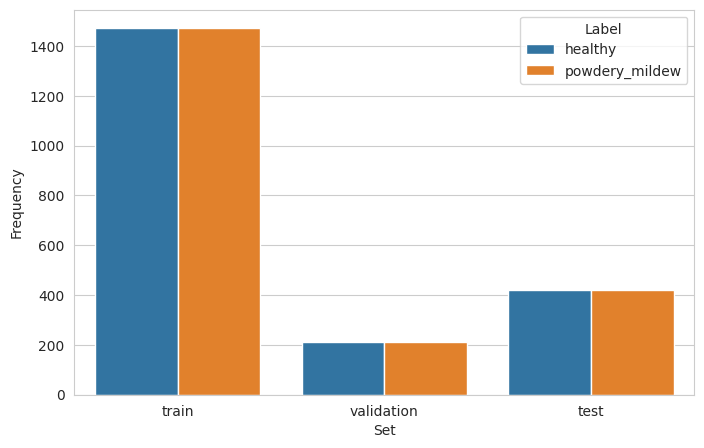

In [9]:
import pandas as pd
freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        freq = freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(cherry_leaves_dir + '/' + folder + '/' + label)))}
                        ),
            ignore_index=True
        )
        print(
            f"* {folder} - {label}: {len(os.listdir(cherry_leaves_dir+'/'+ folder + '/' + label))} images")

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_img_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Import Image Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Image Augmentation

In [11]:
augment = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.10,
                            height_shift_range=0.10,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest',
                            rescale=1./255
                            )

### Augment Train, Validation and Test Image Sets

In [12]:
batch_size = 25
train_set = augment.flow_from_directory(train_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=True
                                        )

validation_set = augment.flow_from_directory(validation_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=False
                                        )

test_set = augment.flow_from_directory(test_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=False
                                        )

train_set.class_indices
validation_set.class_indices
test_set.class_indices

Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [13]:
import matplotlib.pyplot as plt

### Plot Augmentated Images

(256, 256, 3)


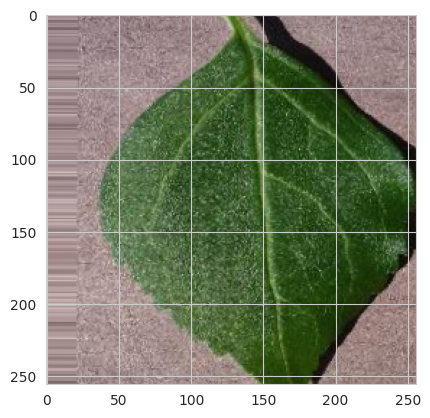

(256, 256, 3)


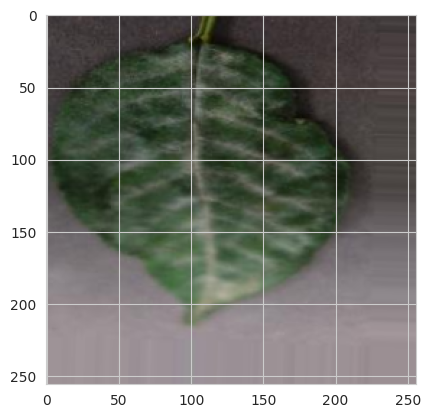

(256, 256, 3)


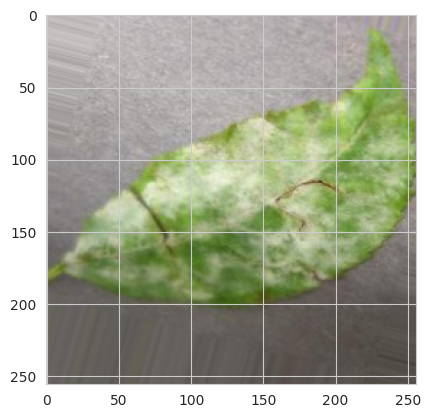

In [14]:
for _ in range(3):
    img, label = train_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

(256, 256, 3)


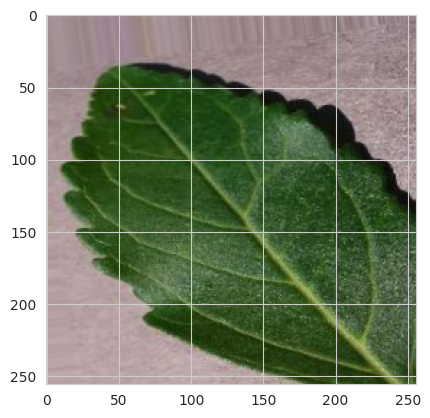

(256, 256, 3)


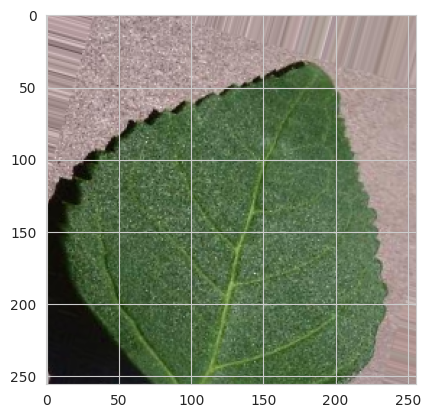

(256, 256, 3)


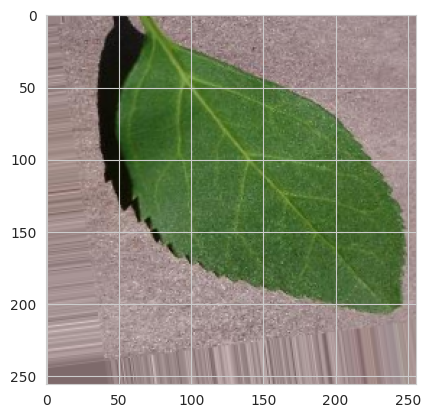

In [15]:
for _ in range(3):
    img, label = validation_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

(256, 256, 3)


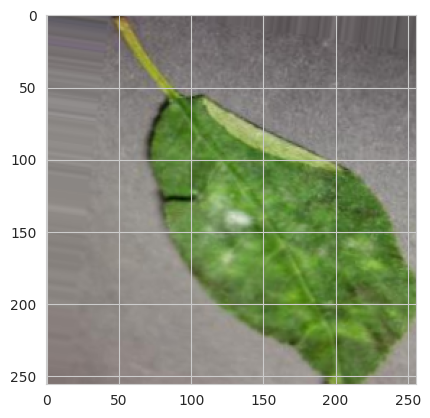

(256, 256, 3)


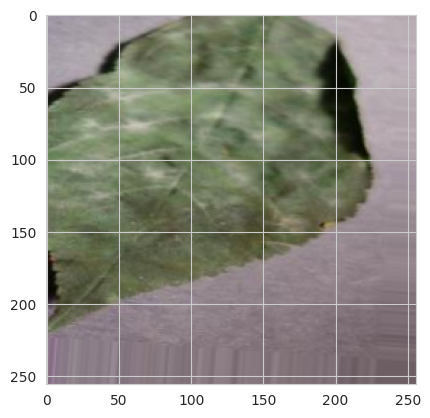

(256, 256, 3)


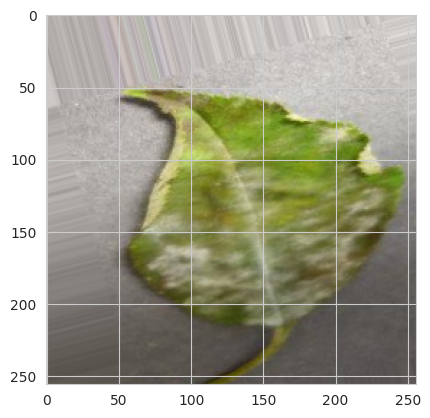

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

In [17]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

### Create CNN Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

def create_model(image_shape=(256, 256, 3)):
    model = Sequential()

    model.add(Conv2D(filters=8, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [23]:
create_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

### Early Stoppage

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

### Prepare Model For Training

In [25]:
model = create_model()
model.fit(train_set,
        epochs=15,
        validation_data=validation_set,
        verbose=1,
        callbacks=[early_stop]
        )

Epoch 1/15
118/118 [==============================] - 161s 1s/step - loss: 0.2138 - accuracy: 0.9093 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 2/15
118/118 [==============================] - 161s 1s/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0064 - val_accuracy: 0.9976
Epoch 3/15
118/118 [==============================] - 159s 1s/step - loss: 0.0246 - accuracy: 0.9908 - val_loss: 0.0521 - val_accuracy: 0.9810
Epoch 4/15
118/118 [==============================] - 160s 1s/step - loss: 0.0399 - accuracy: 0.9864 - val_loss: 0.0121 - val_accuracy: 0.9976
Epoch 5/15
118/118 [==============================] - 161s 1s/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0107 - val_accuracy: 0.9976
Epoch 6/15
118/118 [==============================] - 159s 1s/step - loss: 0.0198 - accuracy: 0.9915 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/15
118/118 [==============================] - 161s 1s/step - loss: 0.0329 - accuracy: 0.9918 - val_loss: 0.0011 - val_accuracy: 1.0000

### Save The Model

In [26]:
model.save('outputs/v1/Mildew_Detection_Model.h5')

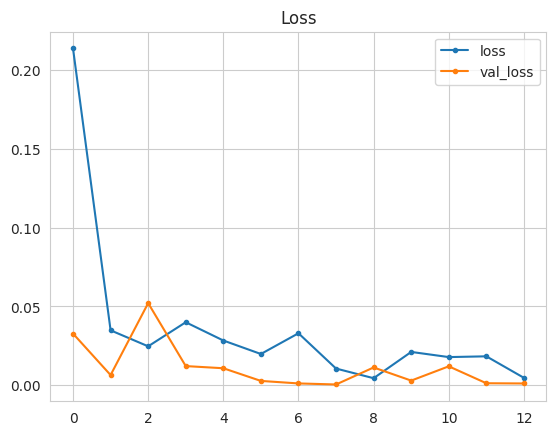

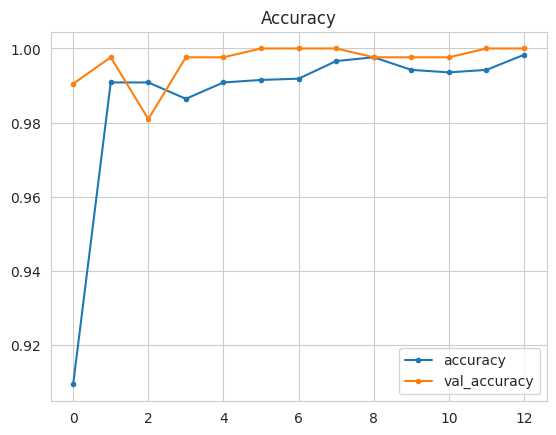

In [27]:
mlc_loss = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
mlc_loss[['loss', 'val_loss']].plot(style='.-')
plt.title('Loss')
plt.savefig(f'{file_path}/model_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

mlc_loss[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title('Accuracy')
plt.savefig(f'{file_path}/model_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Load Model

In [28]:
from keras.models import load_model
model = load_model('outputs/v1/Mildew_Detection_Model.h5')

In [29]:
asses = model.evaluate(test_set)
joblib.dump(value=asses,
            filename=f"outputs/v1/assessment.pkl")

34/34 [==============================] - 17s 476ms/step - loss: 7.3133e-05 - accuracy: 1.0000


['outputs/v1/assessment.pkl']

Image shape: (256, 256), Image mode: RGB


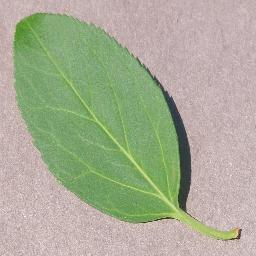

In [30]:
from tensorflow.keras.preprocessing import image

image_number = 189
label = labels[0]

pil_image = image.load_img(test_dir + '/' + label + '/' + os.listdir(test_dir + '/' + label)[image_number],
                            target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [31]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


In [32]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999999914186386
healthy


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---